# Data Wrangling Homework

In the spirit of warming up for final projects, this weeks homework will be somewhat open-ended. Actually, it will more like closed-ended and open-middled...

Different doctors with different backgrounds, trained in different places, etc., might behave differently. In other words, one doctor might have various biases relative to another. We hope not, at least in critical situations, but doctors are people too.

Your job is to determine whether the 4 doctors in our data set are behaving essentially the same with respect to measuring clump thickness, bland chromatin, and diagnosis of tumor type, or whether any one of them seems to be different. 

The submission should be a pdf that makes your case as though to a boss/hospital administrator; it should make the case in enough detail to be convincing, but not in such detail that your boss will hate you. For example, one doctor-to-doctor comparison can be described in some detail, but the rest can be summarized with "Similar comparisons were made for ..."

Your final conclusion should be whether 1) everything seems okay with respect to the doctors or 2) if there are any red flags that might warrent further scrutiny.

Do the analysis with an open mind. It's not good to enter an analysis with a pre-conceived notion of what you may or may not find.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Below data is selected and cleaned.

In [11]:
### Function to clean data
def hit_reset():
    import pandas as pd
    
    bcd = pd.read_csv('./data/breast_cancer_data.csv')      ###loading data
    bcd['patient_id'] = bcd['patient_id'].astype('string')    #changing ID to string
    bcd['doctor_name'] = bcd['doctor_name'].str.split('. ').str[1]    #only leaving surnames
    bcd['bare_nuclei'] = bcd['bare_nuclei'].replace('?', '')     #replacing ? with blank spacr
    bcd['bare_nuclei'] = pd.to_numeric(bcd['bare_nuclei'])     #changing bare_nuclei to numeric
    
    return bcd

In [68]:
#Reading data and selesting needed columns 
bcd = pd.read_csv('data/breast_cancer_data.csv')
bcd = hit_reset()
bcd = bcd[['clump_thickness', 'bland_chromatin', 'class', 'doctor_name']].copy()

In [67]:
# Creating data frames for each doctor
doe_dat = bcd[bcd['doctor_name'] == 'Doe']
smith_dat = bcd[bcd['doctor_name'] == 'Smith']
lee_dat = bcd[bcd['doctor_name'] == 'Lee']
wong_dat = bcd[bcd['doctor_name'] == 'Wong']

In [ ]:
# Created dataframes with means of measurements for each doctor
doe_means = doe_dat.groupby('class').mean(numeric_only = True)
smith_means = smith_dat.groupby('class').mean(numeric_only = True)
lee_means = lee_dat.groupby('class').mean(numeric_only = True)
wong_means = wong_dat.groupby('class').mean(numeric_only = True)

### Below different tables are created to show measurements and count for variables by doctor.

In [152]:
# Created small table to compare means of bland_chromatin by doctor
chr_tab = bcd.pivot_table(index = 'doctor_name', columns = 'class', values = 'bland_chromatin')
chr_tab

class,benign,malignant
doctor_name,,
Doe,2.000000,5.456140
Lee,2.067227,6.150000
Smith,1.980392,6.459459
Wong,2.388889,5.714286


In [151]:
# Created small table to compare means of clump_thickness by doctor
thi_tab = bcd.pivot_table(index = 'doctor_name', columns = 'class', values = 'clump_thickness')
thi_tab

class,benign,malignant
doctor_name,,
Doe,2.637795,7.586207
Lee,2.983471,6.600000
Smith,3.098039,7.356164
Wong,3.166667,7.265306


In [175]:
# Created table to compare number of benign vs malignant by doctor
bcd[['doctor_name', 'class']].pivot_table(index = 'doctor_name', columns = bcd['class'], aggfunc = 'count')

class          
class       benign malignant
doctor_name                 
Doe            127        58
Lee            121        60
Smith          102        74
Wong           108        49

In [201]:
ct_dic = {'doctor': ['Doe', 'Doe', 'Smith', 'Smith', 'Lee', 'Lee', 'Wong', 'Wong'], 
          'class':['benign','malignant','benign','malignant','benign','malignant','benign','malignant'], 
          'count':[127,58,121,60,102,74,108,49]}
ct_dat = pd.DataFrame(ct_dic)
ct_dat

,doctor,class,count
0,Doe,benign,127
1,Doe,malignant,58
2,Smith,benign,121
3,Smith,malignant,60
4,Lee,benign,102
5,Lee,malignant,74
6,Wong,benign,108
7,Wong,malignant,49


In [205]:
pr_dic = {'doctor':['Doe','Smith','Lee','Wong'],
          'prob':[(58/(127+58)), (60/(121+60)), (74/(102+74)), (49/(108+49))]}
pr_dat = pd.DataFrame(pr_dic)
pr_dat

,doctor,prob
0,Doe,0.313514
1,Smith,0.331492
2,Lee,0.420455
3,Wong,0.312102


### Below data is plotted to easily visualize differences in measurements and diagnoses by doctor.

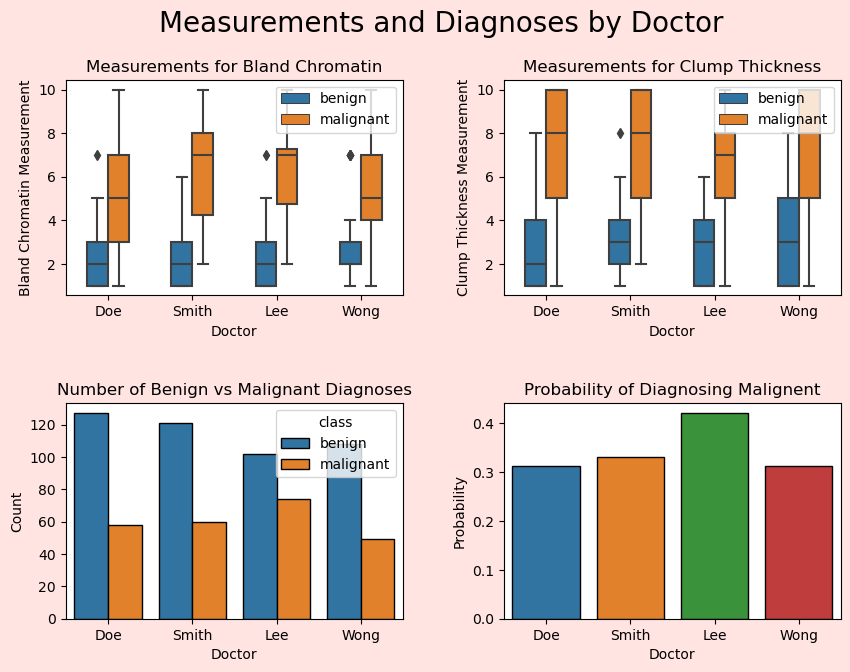

In [245]:
fig = plt.figure(figsize = (10,7), facecolor = 'mistyrose')
fig.suptitle('Measurements and Diagnoses by Doctor', size = 20)

plt.subplot(2,2,1)
sns.boxplot(bcd, x = 'doctor_name', y = 'bland_chromatin', hue = 'class', width = .5)
plt.legend(loc = 'upper right')
plt.title('Measurements for Bland Chromatin')
plt.ylabel('Bland Chromatin Measurement')
plt.xlabel('Doctor')
#plt.xticks(color = 'maroon')

plt.subplot(2,2,2)
sns.boxplot(bcd, x = 'doctor_name', y = 'clump_thickness', hue = 'class', width = .5)
plt.legend(loc = 'upper right')
plt.title('Measurements for Clump Thickness')
plt.ylabel('Clump Thickness Measurement')
plt.xlabel('Doctor')

plt.subplot(2,2,3)
sns.barplot(ct_dat, x = 'doctor', y = 'count', hue = 'class', edgecolor = 'k')
plt.title('Number of Benign vs Malignant Diagnoses')
plt.ylabel('Count')
plt.xlabel('Doctor')

plt.subplot(2,2,4)
sns.barplot(pr_dat, x = 'doctor', y = 'prob', edgecolor = 'k')
plt.title('Probability of Diagnosing Malignent')
plt.ylabel('Probability')
plt.xlabel('Doctor')

plt.subplots_adjust(wspace = .3, hspace = .5)
#plt.tight_layout();

In [315]:
from statsmodels.formula.api import ols

bland_model = ols('bland_chromatin ~ C(doctor_name)', data = bcd)

bland_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        bland_chromatin   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.148
Date:                Wed, 28 Feb 2024   Prob (F-statistic):             0.0246
Time:                        17:38:23   Log-Likelihood:                -1601.2
No. Observations:                 695   AIC:                             3210.
Df Residuals:                     691   BIC:                             3229.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.0765      0.180     17.127      0.000       2.724       3.429
C(doctor_name)[T.Lee]       0.3593      0.255      1.406      0.160      -0.142       0.861
C(doctor_name)[T.Smith]     0.7871      0.257      3.068      0.002       0.283       1.291
C(doctor_name)[T.Wong]      0.3502      0.264      1.325      0.186      -0.169       0.869
==============================================================================
Omnibus:                       91.695   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.389
Skew:                           1.051   Prob(JB):                     1.32e-28
Kurtosis:                       3.112   Cond. No.                         4.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
thi_model = ols('clump_thickness ~ C(doctor_name)', data = bcd)

thi_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        clump_thickness   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.378
Date:                Wed, 28 Feb 2024   Prob (F-statistic):             0.0687
Time:                        17:39:04   Log-Likelihood:                -1709.4
No. Observations:                 698   AIC:                             3427.
Df Residuals:                     694   BIC:                             3445.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.1892      0.207     20.282      0.000       3.784       4.595
C(doctor_name)[T.Lee]      -0.0069      0.294     -0.023      0.981      -0.584       0.570
C(doctor_name)[T.Smith]     0.6851      0.296      2.313      0.021       0.103       1.267
C(doctor_name)[T.Wong]      0.2567      0.305      0.842      0.400      -0.342       0.855
==============================================================================
Omnibus:                       57.901   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.718
Skew:                           0.595   Prob(JB):                     5.88e-12
Kurtosis:                       2.397   Cond. No.                         4.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
import statsmodels.formula.api as smf

log_mod = smf.logit('code ~ C(doctor_name)', data = bcd).fit()
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.639833
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   code   No. Observations:                  699
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                0.006708
Time:                        17:27:57   Log-Likelihood:                -447.24
converged:                       True   LL-Null:                       -450.26
Covariance Type:            nonrobust   LLR p-value:                    0.1096
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.7837      0.158     -4.945      0.000      -1.094      -0.473
C(doctor_name)[T.Lee]       0.0823      0.224      0.368      0.713      -0.356       0.521
C(doctor_name)[T.Smith]     0.4628      0.220      2.103      0.035       0.031       0.894
C(doctor_name)[T.Wong]     -0.0066      0.234     -0.028      0.978      -0.465       0.452
===========================================================================================
"""

In [ ]:
bcd['code'] = [0]*699
bcd.loc[bcd['class'] == 'malignant', 'code'] = 1
#bcd

In [317]:
from sklearn.linear_model import LogisticRegression

bcd['code'] = [0]*699
bcd.loc[bcd['class'] == 'malignant', 'code'] = 1
bcd_dum = pd.get_dummies(bcd, columns = ['doctor_name'])

y = bcd['code']
#y = np.asarray(y)
x = bcd_dum.drop(['clump_thickness','bland_chromatin','class', 'code'], axis = 1)
#x = np.asarray(x)

model = LogisticRegression()
log_mod = model.fit(x,y)
log_mod.coef_

array([[-0.13163924, -0.05138314,  0.32042963, -0.13742827]])